Path from S to G found: S -> A -> C -> G


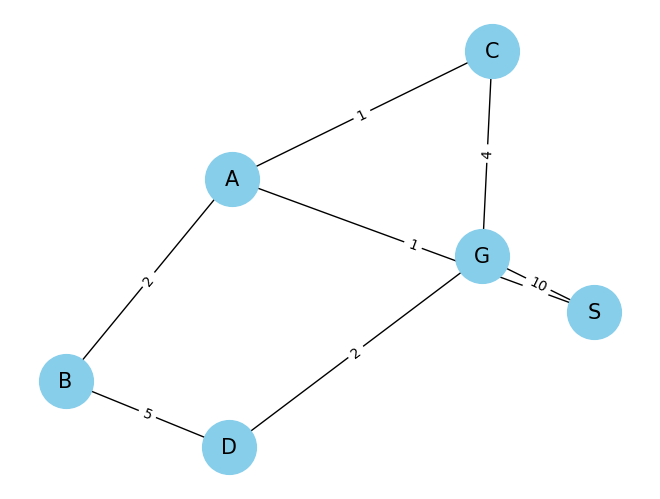

In [5]:
import networkx as nx
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]  # Include neighbor in the current path
                g = 0  # Reset g here before calculating its value
                for i in range(len(new_path) - 1):
                    g += graph[new_path[i]][new_path[i + 1]]['weight']  # Recalculate g for the new path
                pri_queue.put((g + heuristic[neighbor], new_path))

    return []  # Goal not found

# Example graph
G = nx.Graph()
G.add_weighted_edges_from([('S', 'A', 1), ('S', 'G', 10), ('A', 'C', 1), ('A', 'B', 2), ('B', 'D', 5),('C', 'G', 4),('D', 'G', 2)])

start_node = 'S'
goal_node = 'G'

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = astar(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
graph=nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
